# Imports

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from IPython.display import display
%matplotlib inline

# Dataset

In [135]:
df = pd.read_csv('dataset/twitter_sentiment_data.csv')
df.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


# Cible

In [136]:
np.unique(df['sentiment'])

array([-1,  0,  1,  2], dtype=int64)

In [137]:
df.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [138]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

# Elimination de la variable tweetid

In [139]:
df.drop('tweetid', inplace=True, axis=1)

In [140]:
df.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [115]:
!pip install nltk

In [141]:
df.message[5]

'Unamshow awache kujinga na iko global warming https://t.co/mhIflU7M1X'

In [142]:
display(df.shape)

(43943, 2)

In [143]:
df.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [144]:
df.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


# stats

In [145]:
totaux_par_cat = df.sentiment.value_counts()
totaux_par_cat

 1    22962
 2     9276
 0     7715
-1     3990
Name: sentiment, dtype: int64

In [146]:
totaux_par_cat_norm = df.sentiment.value_counts(normalize=True)
totaux_par_cat_norm

 1    0.522541
 2    0.211092
 0    0.175568
-1    0.090799
Name: sentiment, dtype: float64

In [147]:
stats = pd.concat([totaux_par_cat, totaux_par_cat_norm], names=['total', 'proportion'], axis=1)
stats.head()

,sentiment,sentiment
1,22962,0.522541
2,9276,0.211092
0,7715,0.175568
-1,3990,0.090799


In [148]:
df.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


# stats

In [149]:
totaux_par_cat = df.sentiment.value_counts()
totaux_par_cat

 1    22962
 2     9276
 0     7715
-1     3990
Name: sentiment, dtype: int64

In [150]:
totaux_par_cat_norm = df.sentiment.value_counts(normalize=True)
totaux_par_cat_norm

 1    0.522541
 2    0.211092
 0    0.175568
-1    0.090799
Name: sentiment, dtype: float64

In [151]:
stats = pd.concat([totaux_par_cat, totaux_par_cat_norm], names=['total', 'proportion'], axis=1)
stats.head()

,sentiment,sentiment
1,22962,0.522541
2,9276,0.211092
0,7715,0.175568
-1,3990,0.090799


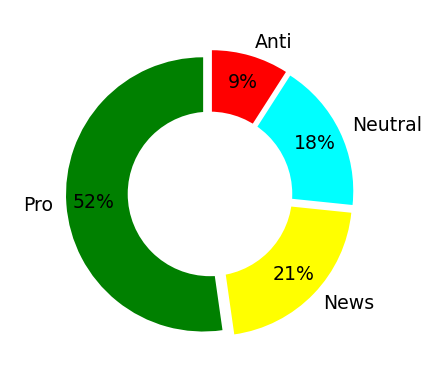

In [154]:
classes = [ 'Pro', 'News', 'Neutral', 'Anti']
custom_colours = ['green', 'yellow', 'cyan', 'red']
offset = [0.05, 0.05, 0.05, 0.05]

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(liste_tot, labels=classes, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8, explode=offset)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

In [155]:
by_sent = df.groupby('sentiment')
by_sent.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."
5,0,Unamshow awache kujinga na iko global warming ...
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."
7,2,RT @CCIRiviera: Presidential Candidate #Donald...
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...


In [157]:
df.message

0        @tiniebeany climate change is an interesting h...
1        RT @NatGeoChannel: Watch #BeforeTheFlood right...
2        Fabulous! Leonardo #DiCaprio's film on #climat...
3        RT @Mick_Fanning: Just watched this amazing do...
4        RT @cnalive: Pranita Biswasi, a Lutheran from ...
                               ...                        
43938    Dear @realDonaldTrump,\nYeah right. Human Medi...
43939    What will your respective parties do to preven...
43940    RT @MikkiL: UN Poll Shows Climate Change Is th...
43941    RT @taehbeingextra: i still can$q$t believe th...
43942    @Likeabat77 @zachhaller \n\nThe wealthy + foss...
Name: message, Length: 43943, dtype: object

In [158]:
df.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


# Train test split

In [161]:
X = df['message']
tf_idf = TfidfVectorizer()
y = df['sentiment']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=7)
print(f'Taille train: {round(X_train.shape[0]/X.shape[0],1)*100}%')
print(f'Taille test: {round(X_test.shape[0]/X.shape[0],1)*100}%')

Taille train: 80.0%
Taille test: 20.0%


In [175]:
X_train.dtype

dtype('O')